In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [68]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)


# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

life_df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [69]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [70]:
# Percent of each column that is null
life_df.isnull().sum()*100/len(life_df)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [71]:
# We have data for 16 years in this df, 2000-2015. Let's see which countries are missing at least one year of data.

# Group by country and count the number of occurances
countries = life_df.groupby(['Country'])[['Country']].count()

# List the countries that have fewer than 16 occurances (less than 16 yrs of data)
missingyr_country_list = countries.loc[countries['Country'] < 16].index
print(missingyr_country_list)

Index(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype='object', name='Country')


In [72]:
life_df.loc[life_df['Country'].isin(missingyr_country_list)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1651,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1716,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1813,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1910,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1959,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2168,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2217,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


We see that these 10 countries are missing data from every year EXCEPT FOR 2013. They are missing over 93% of their data. We note that these countries are relatively small islands, so choosing to exclude them won't have a huge effect on the outcome of this analysis. We will now drop these countries from our df.

In [73]:
life_df = life_df[~life_df['Country'].isin(missingyr_country_list)]
life_df.isnull().sum()*100/len(life_df)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             6.591530
percentage expenditure              0.000000
Hepatitis B                        18.886612
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

Now we see the columns that have the most missing data, listed in order of decreasing missingness:

15% - 21%
1. Population
2. Hepatitis B
3. GDP

5% - 8%
4. Total expenditure
5. Alcohol
6. Income composition of resources
6. Schooling 

0.64% - 1.09%
7. BMI
7. thinness  1-19 years
7. thinness 5-9 years
8. Polio
8. Diphtheria

Since this is a time-series, we'll interpolate this data, starting with the columns with the most missing data. The first three are missing enough data that we should just find another source for this data. The World Bank has population data ranging from 1961 - 2018 for all countries, so we'll join this data with our life expectancy data set. First, we must make sure that the country names match for both data sets.


In [74]:
country_list = life_df.Country.unique()
missing_data_list =['Total expenditure','Alcohol','Income composition of resources','Schooling',' BMI ',
                    ' thinness  1-19 years',' thinness 5-9 years','Polio','Diphtheria ']

# We will interpolate the values for these columns since it's a time series 
for country in country_list:
    life_df.loc[life_df['Country'] == country,missing_data_list] = life_df.loc[life_df['Country'] == country,missing_data_list].interpolate()
    
# Drop Nans after interpolat
life_df.dropna(inplace=True)

# Null values after interpolation
life_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

TypeError: 'AxesSubplot' object is not callable

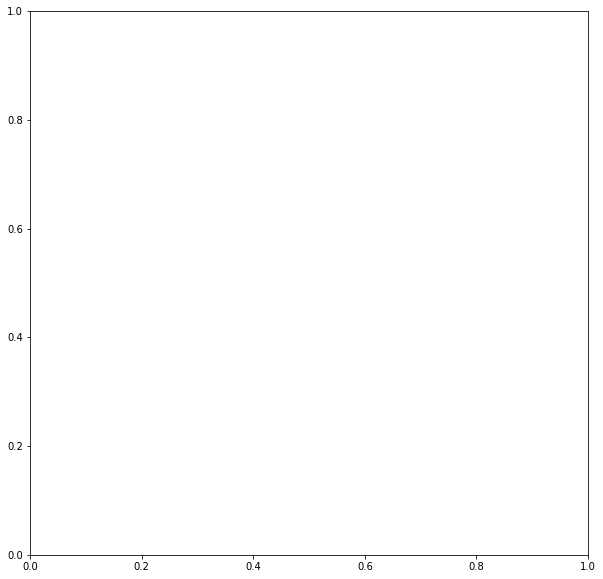

In [76]:
# Let's look at the box plots for each column so we can see the outliers and visualize data
#for column in life_df:
#    plt.figure()
#    life_df.boxplot([column])

columns = ['Country','Year','Status','Life expectancy','Adult Mortality','infant deaths','Alcohol',
             'percentage expenditure','Hepatitis B','Measles',' BMI ','under-five deaths','Polio',
             'Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',
             ' thinness 5-9 years','Income composition of resources','Schooling']

grid = sns.FacetGrid(life_df, col="Country", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)


#fig, ax = plt.subplots(figsize=(10,  10))
#life_df.boxplot(countries, ax)

In [58]:
def interpolate_missing(df,key_column,column_list,limit_dir,**kwargs):
    interp_how = kwargs.get('interp_how','linear')
    for each_value in df[key_column].unique():
        for column in column_list:
            mask = (df[key_column] == each_value)
            df.loc[mask, column] = df.loc[mask, column].interpolate(limit_direction=limit_dir,method=interp_how)
    return df

In [41]:
pop_df = pd.read_csv('country_pops.csv', encoding = 'ISO-8859-1')

worldbank_data = pop_df['Country Name'].to_string(index=False)

who_data = life_df.Country.unique()

print(who_data)

['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Irela

In [79]:
# List of countries who are missing data for Hep B for at least one year

hepb = life_df.groupby(['Country'])[['Hepatitis B']].count()
missing_hepb = hepb.loc[hepb['Hepatitis B'] < 14].index

var = life_df.loc[life_df['Country'].isin(missing_hepb)]
var.Country.unique()

array(['Algeria', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Croatia',
       'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Iraq', 'Ireland', 'Jamaica', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania',
       'Montenegro', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
       'Niger', 'Nigeria', 'Pakistan', 'Paraguay', 'Peru', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Serbia', 'Sierra Leone',
       'Sri Lanka', 'Suriname', 'Sweden', 'Syrian Arab Republic',
       'Tajikistan', 'Timor-Leste', 'Togo', 'Trinidad and Tobago',
       'Turkmenistan', 'Uganda', 'Uzbekistan', 'Zambia'], dtype=object)

In [ ]:
Africa_list = ['Algeria', 'Angola','Burkina Faso', 'Burundi','Cameroon','Central African Republic', 'Chad',
               'Djibouti','Ethiopia','Eritrea','Equatorial Guinea','Gabon','Guinea', 'Guinea-Bissau','Lesotho', 'Liberia',
               'Mali','Mauritania','Namibia','Niger', 'Nigeria','Senegal','Sierra Leone', 'Togo', 'Zambia','Comoros','Sao Tome and Principe'] 
South_Asia = ['Bangladesh','Cambodia','India','Myanmar','Nepal','Sri Lanka', 'Timor-Leste']
South_America = ['Suriname','Paraguay','Peru','Jamaica','Haiti','Guatemala','Chile']
Eastern_Europe = ['Croatia','Estonia','Malta','Serbia','Bosnia and Herzegovina']
Middle_East = ['Iraq','Pakistan','Syrian Arab Republic']
Europe = ['Canada','Ireland','Sweden']


In [51]:
# Interpolate missing values based on neighbors' values

In [57]:
gdp_df = pd.read_csv('countries_gdp.csv', encoding = 'ISO-8859-1')

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

- Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

- Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

- In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

- Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to-  nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.